In [1]:
!conda env create -f pymc-env.yml
!conda activate pymc-voc
!python -m ipykernel install --user --name pymc-voc --display-name "PyMC VOC (safe)"


CondaValueError: prefix already exists: /opt/conda/envs/pymc-voc

usage: conda [-h] [-v] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'doctor', 'env')
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec pymc-voc in /home/ese/.local/share/jupyter/kernels/pymc-voc


In [2]:
!pip uninstall pymc -y

Found existing installation: pymc 5.25.1
Uninstalling pymc-5.25.1:
  Successfully uninstalled pymc-5.25.1


In [ ]:
!conda install -c conda-forge pymc=5.9.0 numpy=1.23.5 arviz=0.15.1 xarray=2023.6.0

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: / 

In [3]:
import pymc as pm
import arviz as az
import numpy as np
import xarray as xr

print("PyMC:", pm.__version__)
print("NumPy:", np.__version__)
print("ArviZ:", az.__version__)
print("xarray:", xr.__version__)

ModuleNotFoundError: No module named 'pymc'

In [1]:
!pip install scipy scikit-learn

In [2]:
from scipy.signal import savgol_filter
from sklearn.linear_model import RANSACRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the Raman spectral data from the text file
file_path = "Sample 0.txt"

# Read the data while skipping the header lines
df = pd.read_csv(file_path, sep="\t", comment="#", header=None)

# Keep only the first column pair as wavenumber and intensity
wavenumbers = df.iloc[:, [0,2,4]]
intensities = df.iloc[:, [1,3,5]]

In [4]:
wavenumbers

,0,2,4
0,wn(8/4/2025 3:49:36 PM Index:3),wn(8/4/2025 3:47:54 PM Index:2),wn(8/4/2025 3:46:13 PM Index:1)
1,180.486708504808,180.486708504808,180.486708504808
2,181.467628538334,181.467628538334,181.467628538334
3,182.449291791087,182.449291791087,182.449291791087
4,183.429905306741,183.429905306741,183.429905306741
...,...,...,...
1336,1355.81993629043,1355.81993629043,1355.81993629043
1337,1356.608186908,1356.608186908,1356.608186908
1338,1357.39632837819,1357.39632837819,1357.39632837819
1339,1358.18436072365,1358.18436072365,1358.18436072365


In [5]:
intensities

,1,3,5
0,8/4/2025 3:49:36 PM Index:3,8/4/2025 3:47:54 PM Index:2,8/4/2025 3:46:13 PM Index:1
1,0.444351268066051,0.689969217362016,0.457959214862805
2,0.482111586460149,0.656921923683754,0.486114486317759
3,0.449004541203853,0.663859670218808,0.46658750098449
4,0.469562899526185,0.652870368664354,0.441768257958567
...,...,...,...
1336,0.0956976243127492,0.0221904579963906,0.0436475872340903
1337,0.111030583461004,0.0405412158608649,0.062196500577219
1338,0.133572386537997,0.042606687878015,0.0331854534423533
1339,0.0886414031987004,0.0387935584994571,0.028452142763118


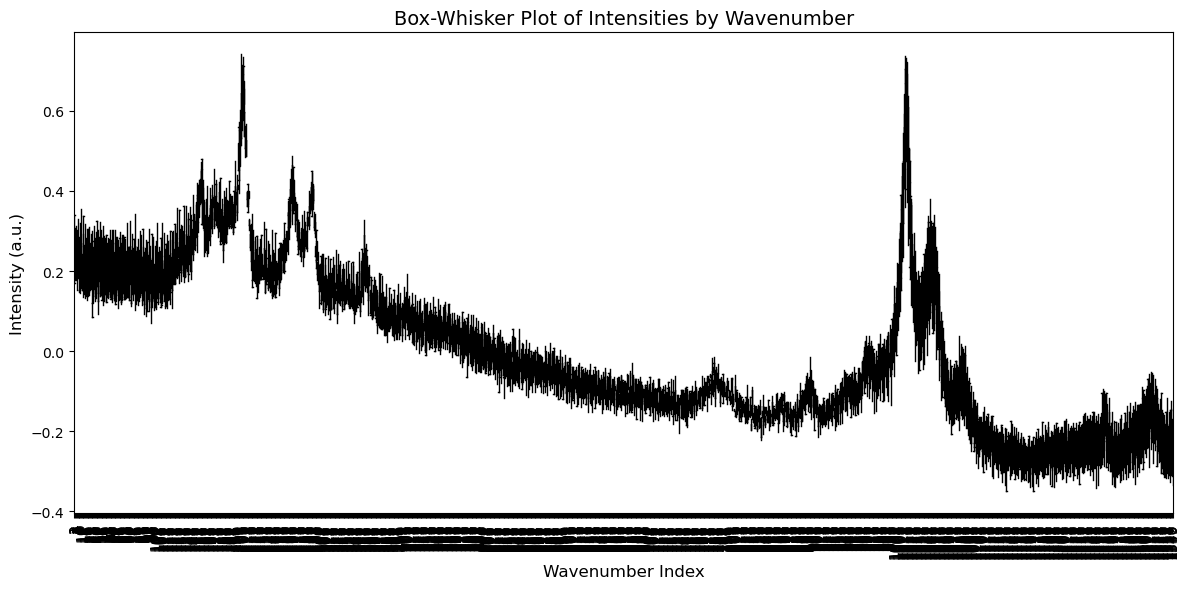

In [6]:
# Plot the consensus spectrum for Sample 0 in black and white
df = intensities.iloc[1:].reset_index(drop=True)
df = df.apply(pd.to_numeric, errors='coerce')
df_centered = df - df.mean(axis=0)

df_t = df_centered.T
# Rename columns to categorical sample labels
df_t.columns = [f"{i+1}" for i in range(df_t.shape[1])]

# Boxplot (each row now shown as a box) to check the agreement across the 3 measurements taken per sample
plt.figure(figsize=(12, 6))
df_t.boxplot(grid=False, color=dict(boxes='black', whiskers='black', medians='black', caps='black'))

plt.xlabel("Wavenumber Index", fontsize=12)
plt.ylabel("Intensity (a.u.)", fontsize=12)
plt.title("Box-Whisker Plot of Intensities by Wavenumber", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("mean_centered_boxplot_s0_Spectra.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
!pip install --upgrade pymc

  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [8]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
pymc 5.25.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.23.5 which is incompatible.


In [55]:
# Bayesian Polynomial Regression
import pymc as pm

In [56]:
df = df_centered

# Step 1: stack replicates
x = np.repeat(df.index.astype(float).values, 3)  # repeat each wavenumber 3 times
y = df.iloc[:, 0:3].values.flatten()  # flatten the 3 columns into one long vector

In [57]:
# Step 2: Normalize x for numerical stability
# x_norm = (x - np.mean(x)) / np.std(x)
x_norm = np.repeat(df.index.astype(float).values,1)

In [58]:
x_norm

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.337e+03, 1.338e+03,
       1.339e+03])

In [64]:
# Step 3: Bayesian polynomial regression model
degree = 5  # polynomial degree

with pm.Model() as model:
    # Priors for polynomial coefficients
    coeffs = pm.Normal("coeffs", mu=0, sigma=10, shape=(degree + 1,))
    
    # Polynomial features
    X_poly = np.vstack([x_norm**i for i in range(degree + 1)]).T
    mu = pm.math.dot(X_poly, coeffs)

    # Observation noise (shared across all points)
    sigma = pm.HalfNormal("sigma", sigma=1.0)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Sample
    # trace = pm.sample(1000, tune=1000, target_accept=0.95, cores=2, progressbar=True) this line errors because of numpy.spawn issues
    trace = pm.sample(1000, tune=1000, target_accept=0.95, chains=1, cores=1, random_seed=42)
# Posterior prediction (mean of fitted model)
posterior_coeffs = trace.posterior["coeffs"].mean(dim=["chain", "draw"]).values

# Plot original data (with jitter to separate replicates visually)
x_unique = df.index.astype(float).values
x_jittered = [x_unique + j*0.1 for j in [-1, 0, 1]]
y_reps = [df.iloc[:, j].values for j in range(3)]

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(x_jittered[i], y_reps[i], '.', color='gray', alpha=0.6)

# Plot fitted curve
x_plot = np.linspace(min(x), max(x), 500)
x_plot_norm = (x_plot - np.mean(x)) / np.std(x)
X_plot_poly = np.vstack([x_plot_norm**i for i in range(degree + 1)]).T
y_fit = np.dot(X_plot_poly, posterior_coeffs)

plt.plot(x_plot, y_fit, color='black', linewidth=2, label='Bayesian Fit')
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Centered Intensity (a.u.)")
plt.title("Bayesian Polynomial Fit with Replicate Uncertainty")
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: 'numpy.random._generator.Generator' object has no attribute 'spawn'

In [42]:
# Degree of polynomial
degree = 5

with pm.Model() as model:
    # Priors for polynomial coefficients
    coeffs = pm.Normal("coeffs", mu=0, sigma=10, shape=(degree + 1,))
    
    # Model equation
    Y_poly = np.vstack([y ** i for i in range(degree + 1)]).T
    mu = pm.math.dot(Y_poly, coeffs)
    
    # Observation noise
    sigma = pm.HalfNormal("sigma", sigma=1.0)
    
    # Likelihood
    x_obs = pm.Normal("x_obs", mu=mu, sigma=sigma, observed=x)
    
    # Inference
    trace = pm.sample(1000, tune=1000, cores=2, progressbar=True)

AttributeError: 'numpy.random._generator.Generator' object has no attribute 'spawn'

In [ ]:
# Bayesian Polynomial Regression
import pymc as pm
df = df_centered
# Example: use one row of your spectrum
x = df.columns.astype(float)
y = df.iloc[0].values.astype(float)  # First spectrum

# Normalize x for stability
x_norm = (x - np.mean(x)) / np.std(x)

# Degree of polynomial
degree = 5

with pm.Model() as model:
    # Priors for polynomial coefficients
    coeffs = pm.Normal("coeffs", mu=0, sigma=10, shape=(degree + 1,))
    
    # Model equation
    X_poly = np.vstack([x_norm ** i for i in range(degree + 1)]).T
    mu = pm.math.dot(X_poly, coeffs)
    
    # Observation noise
    sigma = pm.HalfNormal("sigma", sigma=1.0)
    
    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Inference
    trace = pm.sample(1000, tune=1000, cores=2, progressbar=True)

# Posterior mean prediction
posterior_means = trace.posterior["coeffs"].mean(dim=["chain", "draw"]).values
y_fit = np.dot(X_poly, posterior_means)

# Plot result
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Observed", color='gray')
plt.plot(x, y_fit, label="Bayesian Fit", color='black', linewidth=2)
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Intensity (a.u.)")
plt.title("Bayesian Polynomial Fit to Raman Spectrum")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Plot the Raman spectrum
plt.figure(figsize=(12, 6))
plt.plot(wavenumbers, intensities, label="Blank Paper")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Intensity (a.u.)")
plt.title("Raman Spectrum of Blank Chromatography Paper")
plt.xlim(100, 1000)  # focus on lower wavenumber region
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Define a simple baseline correction using polynomial fitting with RANSAC
def baseline_correction(x, y, window_length=51, polyorder=3):
    # Smooth the data to approximate the baseline
    smoothed = savgol_filter(y, window_length, polyorder)
    # Subtract smoothed baseline from original
    corrected = y - smoothed
    return corrected

# Apply baseline correction to Sample 29
baseline_corrected_29 = baseline_correction(wavenumbers3, residual_intensity_3)

# Plot the corrected spectrum
plt.figure(figsize=(12, 6))
plt.plot(wavenumbers3, baseline_corrected_29, label="Sample 29 (Baseline Corrected)", color="purple")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Corrected Intensity (a.u.)")
plt.title("Baseline-Corrected Raman Spectrum: Sample 29 (Eucalyptus Oil + AgNPs)")
plt.xlim(100, 1000)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)